In [740]:
from math import *
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [741]:
mu, k = 3, 45

In [742]:
kp, kd, ki = 500, 30, 10

In [743]:
#no control
def damped_osc(x,t):
    return np.array([-mu*x[0] -k*x[1] - 9.8, x[0], x[1]])

In [744]:
x0 = np.random.rand(3)
time = np.linspace(0, 10, 1000)

In [745]:
solution_wo_c = {"damped oscillator": odeint(damped_osc, x0, time)}

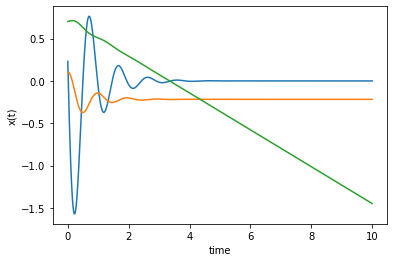

In [746]:
#plot without control
plt.subplot(1, 1, 1)
plt.plot(time, solution_wo_c["damped oscillator"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

In [747]:
#using control
def controlled_damped_osc(x,t):
    x_desired = 5*t
    x_dot_desired = 5
    x_int_desired = (5.0/2)*t*t
    
    error = x_desired - x[1]
    error_dot = x_dot_desired - x[0]
    error_int = x_int_desired - x[2]
    
    u = kp* error + kd * error_dot + ki * error_int
    return np.array([u -mu*x[0] -k*x[1], x[0], x[1]])

In [748]:
solution_w_c = {"controlled damped oscillator": odeint(controlled_damped_osc, x0, time)}

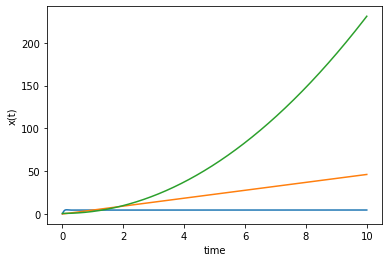

In [749]:
#plot with control
plt.subplot(1, 1, 1)
#plt.ylim(-.5, 10)
plt.plot(time, solution_w_c["controlled damped oscillator"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()